In [13]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
avikasliwal_used_cars_price_prediction_path = kagglehub.dataset_download('avikasliwal/used-cars-price-prediction')

print('Data source import complete.')


Data source import complete.


# Abstract


Approximately 40 million used vehicles are sold each year. Effective pricing strategies can help any company to efficiently sell its products in a competitive market and making profit. In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it. And, the rise of used cars sales is exponentially increasing. Car sellers sometimes take advantage of this scenario by listing unrealistic prices owing to the demand.

Therefore, arises a need for a model that can assign a price for a vehicle by evaluating its features taking the prices of other cars into consideration. In this Notebook, we use supervised learning methods to predict the prices of used cars. The model has been chosen after careful exploratory data analysis to determine the impact of each feature on price.

So, we propose a methodology using Machine Learning models to predict the prices of used cars given the features. The price is estimated based on the number of features as mentioned above.

Notebook outline:

+ Step 1, we collect the data about used cars, identify important features that reflect the price.
+ Step 2, we preprocess and remove entries with NA values. Discard features that are not relevant for the prediction of the price.
+ Step 3, we apply ML models on the preprocessed dataset with features as inputs and the price as output.

By applying 9 models, the GradientBoostingRegressor gives very encouraging results with 99.1% on training set and 96.2% accuracy on prediction.

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# I. INTRODUCTION

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, the cars are mostly bought on a lease basis, where there is an agreement between the buyer and seller. These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world.

Given the description of used cars, the prediction of used cars is not an easy task. There are a variety of features of a car like the age of the car, its make, the origin of the car (the original country of the manufacturer), its mileage (the number of mildes it has run) and its horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, style, braking system, the volume of its cylinders (measured in cc), acceleration, the number of doors, safety index, size, weight, height, paint color, consumer reviews, prestigious awards won by the car manufacturer.

Other options such as sound system, air conditioner, power steering, cosmic wheels, GPS navigator all may influence the
price as well.

# II. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [15]:
data = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')


Firstly, we imported some basic Libraries.

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

And Libraries for ML

In [17]:
!pip install sklearn.metrics
!pip install plot_confusion_matrix

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [18]:
from lightgbm import LGBMClassifier
from sklearn import metrics, model_selection, preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    RandomForestRegressor,
    AdaBoostRegressor,
    BaggingRegressor
)
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error,
    ConfusionMatrixDisplay  # Corrected import
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
try:
    from catboost import CatBoostRegressor
except ModuleNotFoundError:
    print("CatBoost is not installed. Install it using: !pip install catboost")
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

CatBoost is not installed. Install it using: !pip install catboost


In [19]:
data.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


In [20]:
test.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,10


Let's drop the 'New_Price' and 'Unnamed:0' columns.

In [21]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

And, drop all NaN data.

In [22]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [23]:
data.shape

(5975, 12)

In [24]:
test.shape

(1223, 11)

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [25]:
listtrain = data['Name']
listtest = test['Name']

# prints the missing in listrain
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Mercedes-Benz S Class 2005 2013 320 L', 'Fiat Grande Punto 1.2 Emotion', 'Tata Tiago AMT 1.2 Revotron XTA', 'Mahindra Bolero SLX', 'Hyundai Santro Xing XG AT eRLX Euro III', 'Tata Tiago 1.05 Revotorq XT Option', 'Tata Indica Vista Aqua TDI BSIII', 'Ford Fiesta 1.4 SXI Duratorq', 'Honda City i DTec VX Option BL', 'Renault Duster 85PS Diesel RxZ', 'Renault Lodgy 110PS RxL', 'Nissan Micra XL CVT', 'Toyota Etios Liva 1.4 VXD', 'Maruti SX4 ZXI AT', 'Mercedes-Benz CLA 45 AMG', 'Maruti 800 DX', 'Honda Accord 2001-2003 2.3 VTI L MT', 'Maruti Ertiga VXI Petrol', 'Mahindra KUV 100 G80 K4 Plus 5Str', 'Honda WRV i-DTEC VX', 'Maruti Swift AMT ZXI', 'Renault Koleos 4X2 MT', 'Hyundai Xcent 1.2 CRDi SX', 'Tata Manza Club Class Safire90 LX', 'Toyota Etios Cross 1.2L G', 'Land Rover Range Rover HSE', 'Chevrolet Enjoy 1.4 LTZ 8', 'Chevrolet Sail Hatchback 1.2', 'Mahindra Scorpio S10 8 Seater', 'Toyota Etios Liva VD', 'Fiat Avventura FIRE Dynamic', 'Hyundai Creta 1.6 VTVT B

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [26]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [27]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [28]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Nissan 370Z', 'Isuzu MU', 'Fiat Abarth', 'Toyota Land', 'Bentley Flying', 'Hindustan Motors', 'OpelCorsa 1.4Gsi'}


In [29]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z',
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [30]:
test.shape

(1216, 12)

In [31]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: set()


In [32]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz


Now, we will convert all data of columns "Mileage", "Engine", "Power", "Seats" into float.

In [33]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [34]:
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [35]:
test.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [36]:
data.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object
Power,object


In [37]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [38]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,113.254882,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,53.415632,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [39]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

# III. EXPLORATORY DATA ANALYSIS

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that
can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box
plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target
feature.

In [40]:
data.head(3)

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


Now, let's check the Price first.

Skewness: 3.334741
Kurtosis: 17.073183


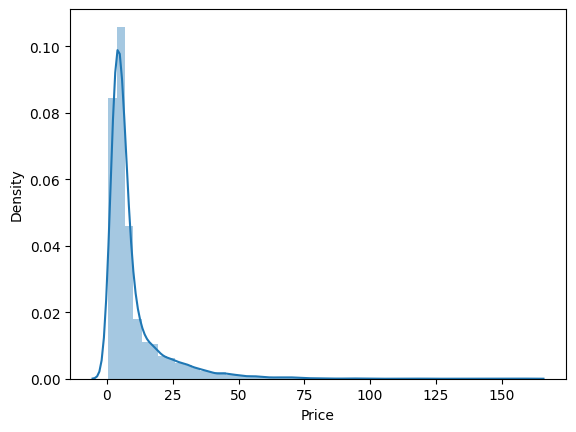

In [41]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset.

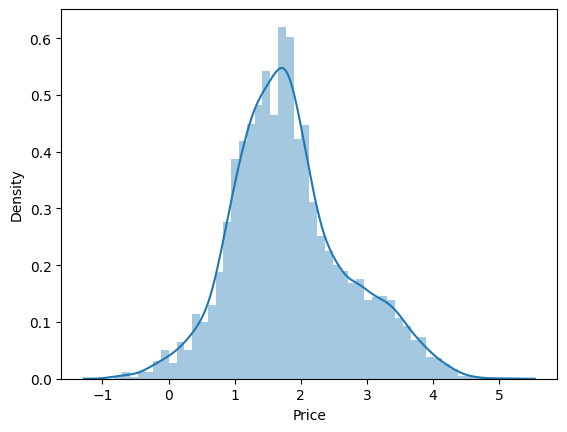

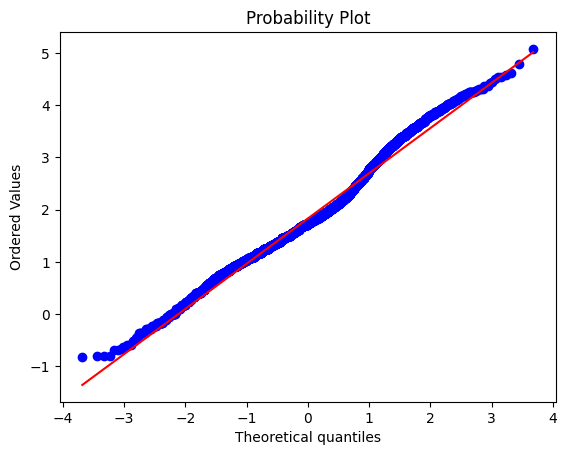

In [42]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

# RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [43]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")

import pandas as pd
import numpy as np

# Ensure only numerical columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation
corr = numeric_data.corr()

# Ensure 'Price' is a column in your dataset
if "Price" in corr.columns:
    corr.sort_values(["Price"], ascending=False, inplace=True)
    print(corr["Price"])
else:
    print("Column 'Price' not found in the dataset.")

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


In [44]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type',
           values='Price', title='Price vs Fuel_type')

Wow, Diesel vehicles are the majority, NOT petrole cars.

In [45]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [46]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

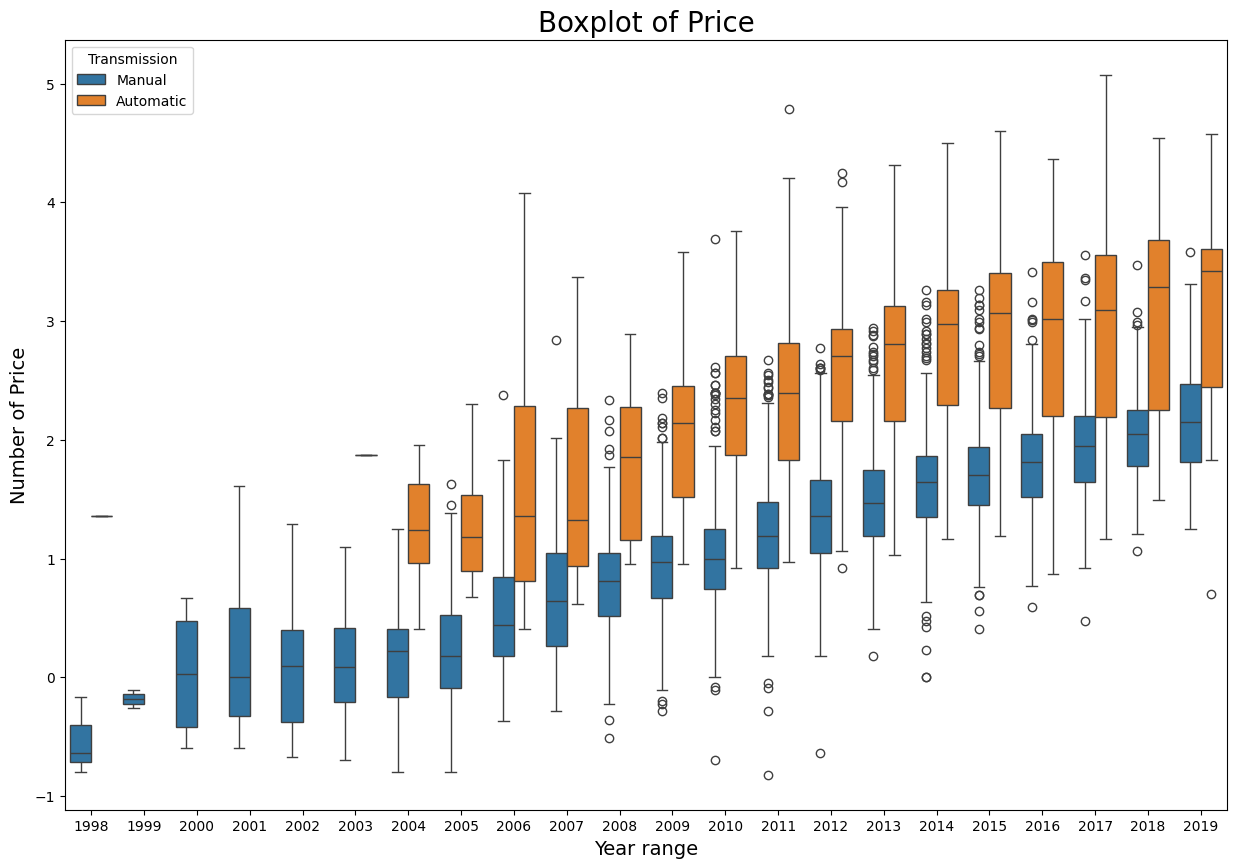

In [47]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

Yeah ! "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

In [48]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])

It's quite BIZZA that, the THIRD OWNER' CARS are sometime more expensive than the second-hand :)

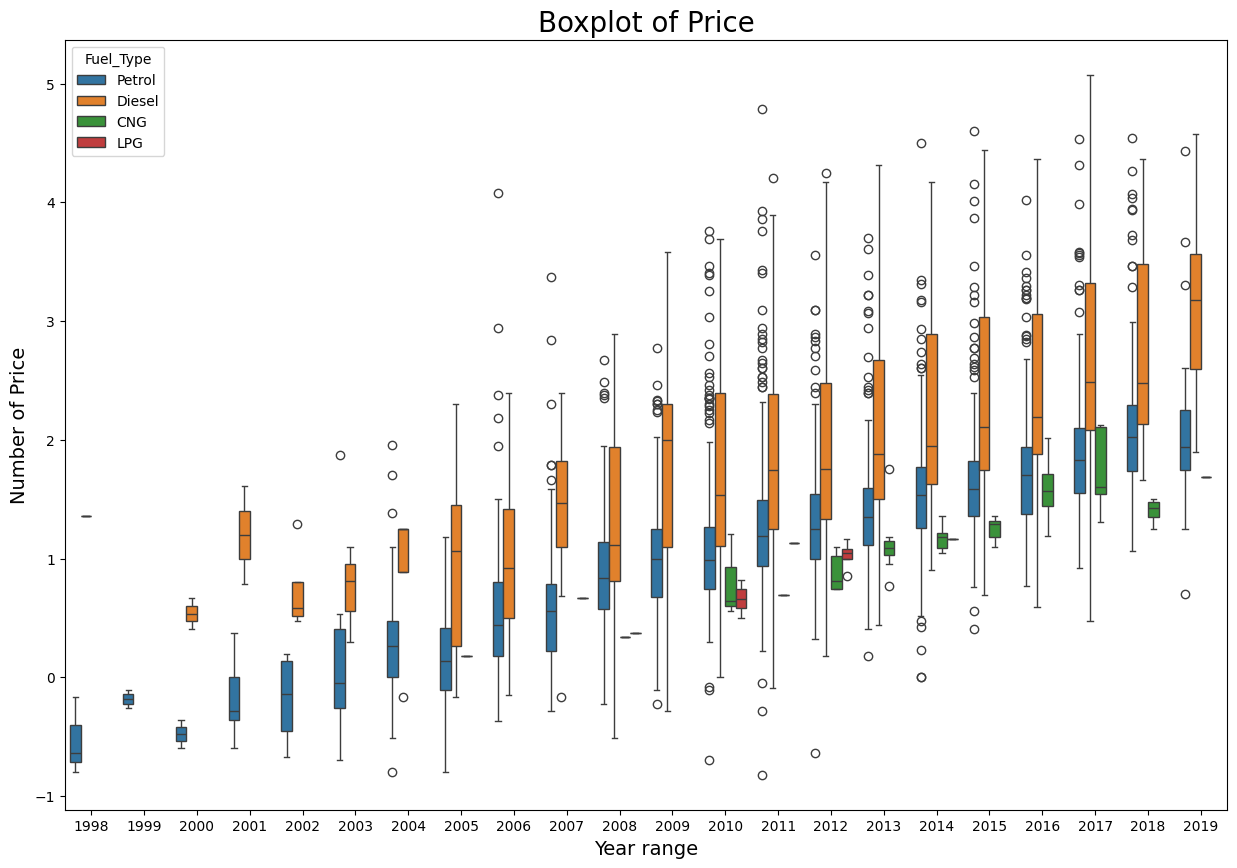

In [49]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [50]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

Again, this confirmed that the Petrol vehicle is cheaper than the Diesel.

In [51]:
px.violin(data, y='Price', x='Seats', color=None, box=True, points="all", hover_data=data.columns)

In [52]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

# IV. MODEL DESCRIPTION

To compute the price for vehicles, this platform may compute linear regression model that defines a set of input variables. However, it does not give details as what features can be used for specific type of vehicles for such prediction. We have taken important features for predicting the price of used cars using random forest models.

Zhang et al. [2] use Kaggle data-set to perform price prediction of a used car. The author evaluates the performance
of several classification methods (logistic regression, SVM, decision tree, Extra Trees, AdaBoost, random forest) to assess
the performance. Among all these models, random forest classifier proves to perform the best for their prediction task.

This work uses eleven (11) features ('Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats') to perform the classification task after removal of irrelevant features from the dataset which gives an accuracy of 96.2% on the test data. We also use Kaggle data-set to perform prediction of used-car prices.

Work by Durgesh et al. [4] gives a good introductory paper on Support Vector Machine. The authors assess the performance of several classification techniques (K-NN, RuleBased Classifiers, etc.) by performing the comparative assessment of SVM with others. This comparative study is done using several data-sets taken from the UCI Machine Learning Repository. This assessment yields that SVM gives much better classification accuracy in comparison to others.

The Author of the paper [5] predicts the price of used cars in Mauritius by using four comparable machine learning algorithms - multiple linear regression, k-nearest neighbors, naive Bayes and decision trees algorithm. The author uses historical data collected from daily newspapers in Mauritius. The application of listed learning algorithms on this data provides comparable results with not-so-good prediction accuracy. The main difference, however, between classifying price range and spam mail, is that spam email classification task is a binary one, whereas our motive is mainly one-vs-therest.

**A. Data preparation & Model Parameters**

In this Notebook, we do not discuss in deep about the Models' parameters, we just applied the standard or refer to previous recommendations. Let's copy the database.

In [53]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [54]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [55]:
df_test.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,106,4,0,1,0,2014,40929,32.26,998.0,58.2,4.0
1,106,3,3,1,2,2013,54493,24.70,796.0,47.3,5.0


In [56]:
df_train.head(2)

,Cars,Location,Fuel_Type,Transmission,Owner_Type,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,124,9,0,1,0,2010,72000,26.60,998.0,58.16,5.0,0.559616
1,65,10,1,1,0,2015,41000,19.67,1582.0,126.20,5.0,2.525729


**B. Training and Testing**

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

In [57]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
          'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [58]:
def Models(models):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10))
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Firstly, take a quick look at the correlation matrix.

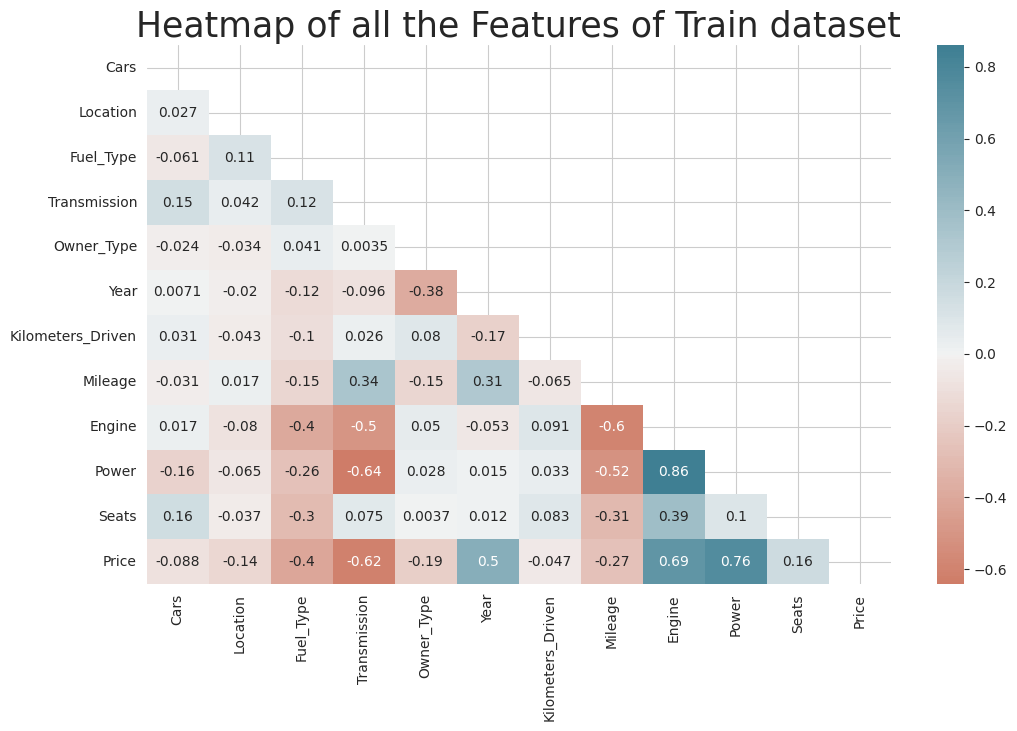

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(12, 7))

# Plotting heatmap. Generate a mask for the upper triangle
mask = np.zeros_like(df_train.corr(), dtype=bool)  # Fixed np.bool deprecation
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center=0)
plt.title("Heatmap of all the Features of Train dataset", fontsize=25)
plt.show()


**C. Models comparison**

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [60]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

# Define data function (placeholder, replace with actual function)
def Definedata():
    # Replace with actual data loading logic
    X = np.random.rand(100, 5)
    y = np.random.rand(100)
    return X, y

X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

regressors = [
    ['DecisionTreeRegressor', DecisionTreeRegressor()],
    ['XGBRegressor', XGBRegressor()],
    ['RandomForestRegressor', RandomForestRegressor()],
    ['MLPRegressor', MLPRegressor()],
    ['AdaBoostRegressor', AdaBoostRegressor()],
    ['ExtraTreesRegressor', ExtraTreesRegressor()]
]

Acc = pd.DataFrame(columns=['model', 'Root Mean Squared Error', 'Accuracy on Training set', 'Accuracy on Testing set'])

for mod in regressors:
    name, model = mod
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS = model.score(X_train, y_train)
    ATeS = model.score(X_test, y_test)

    new_row = pd.DataFrame([{'model': name, 'Root Mean Squared Error': RMSE, 'Accuracy on Training set': ATrS, 'Accuracy on Testing set': ATeS}])
    Acc = pd.concat([Acc, new_row], ignore_index=True)

print(Acc)

                   model  Root Mean Squared Error  Accuracy on Training set  \
0  DecisionTreeRegressor                 0.408541                  1.000000   
1           XGBRegressor                 0.366369                  0.999992   
2  RandomForestRegressor                 0.319315                  0.815027   
3           MLPRegressor                 0.322041                 -0.099229   
4      AdaBoostRegressor                 0.351187                  0.682081   
5    ExtraTreesRegressor                 0.326641                  1.000000   

   Accuracy on Testing set  
0                -0.791945  
1                -0.441091  
2                -0.094691  
3                -0.113460  
4                -0.324132  
5                -0.145500  


In [62]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Training set,Accuracy on Testing set
0,DecisionTreeRegressor,0.408541,1.000000,-0.791945
1,XGBRegressor,0.366369,0.999992,-0.441091
4,AdaBoostRegressor,0.351187,0.682081,-0.324132
5,ExtraTreesRegressor,0.326641,1.000000,-0.145500
3,MLPRegressor,0.322041,-0.099229,-0.113460
2,RandomForestRegressor,0.319315,0.815027,-0.094691


		Error Table
Mean Absolute Error      :  0.26192974355557785
Mean Squared  Error      :  0.09385157800832594
Root Mean Squared  Error :  0.30635204913355146
Accuracy on Traing set   :  0.8498734677662747
Accuracy on Testing set  :  0.008651717899010092


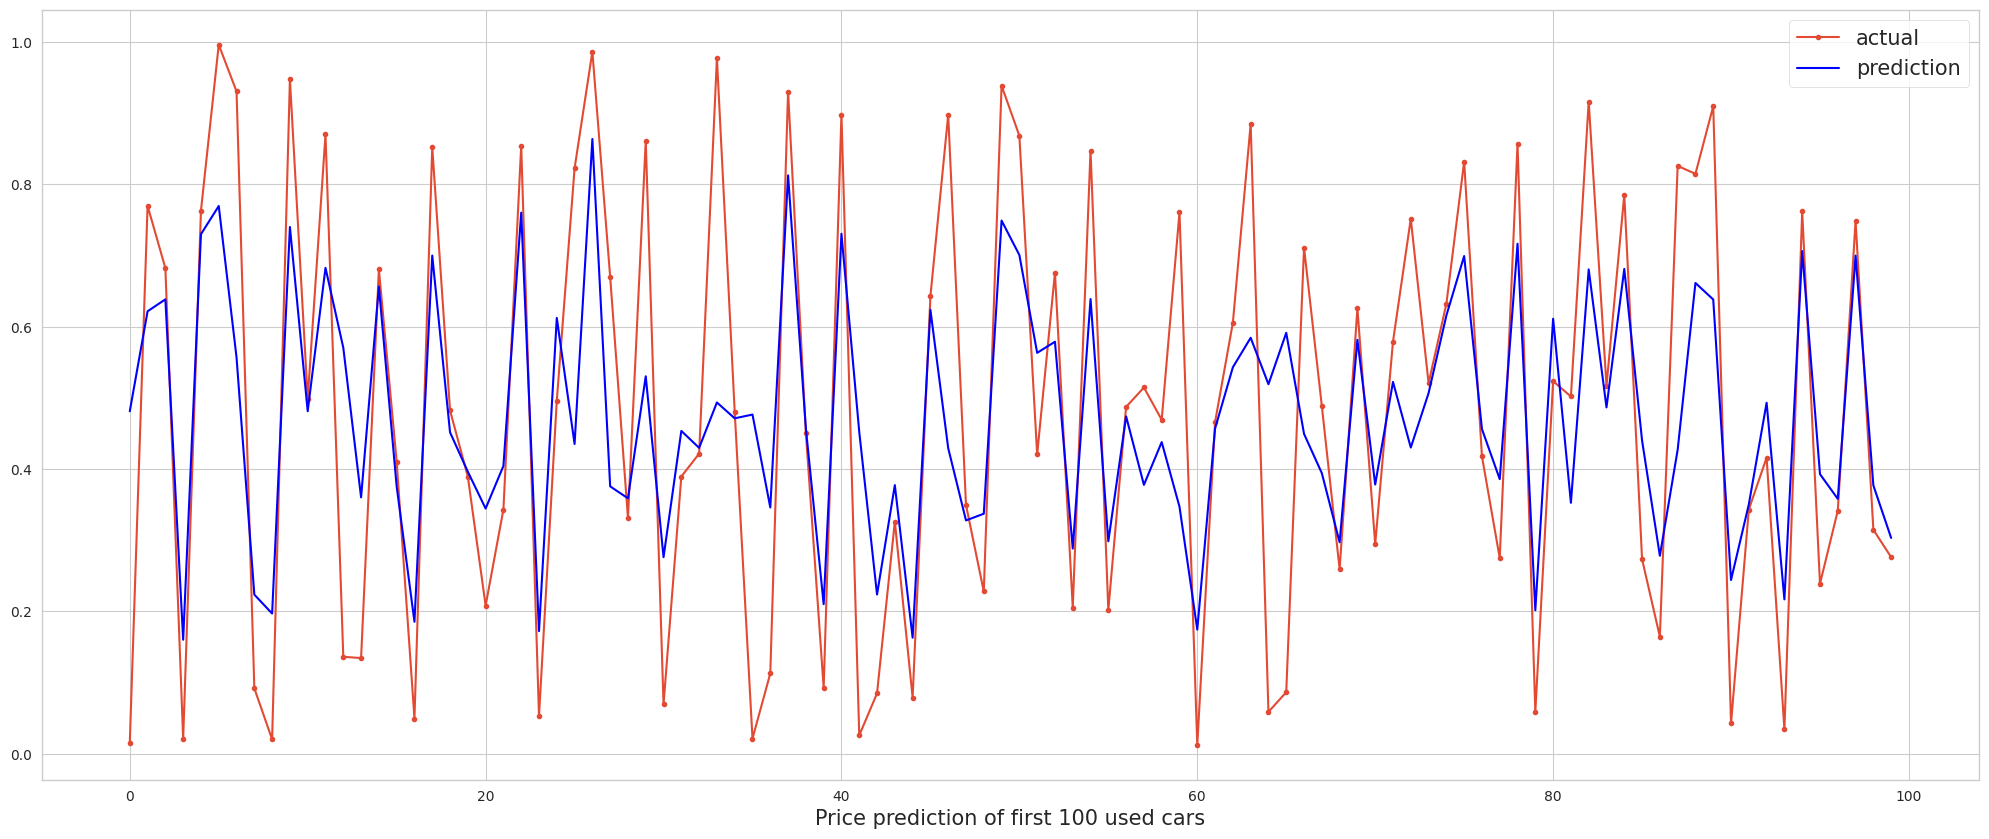

In [63]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25))

# Ensure the lengths match
min_length = min(len(y_actual), len(y_predicted))
Graph_prediction(min_length, y_actual[:min_length], y_predicted[:min_length])


		Error Table
Mean Absolute Error      :  0.26455089760368794
Mean Squared  Error      :  0.11213508032133868
Root Mean Squared  Error :  0.33486576463015544
Accuracy on Traing set   :  0.9999999999999969
Accuracy on Testing set  :  -0.6209196917869688


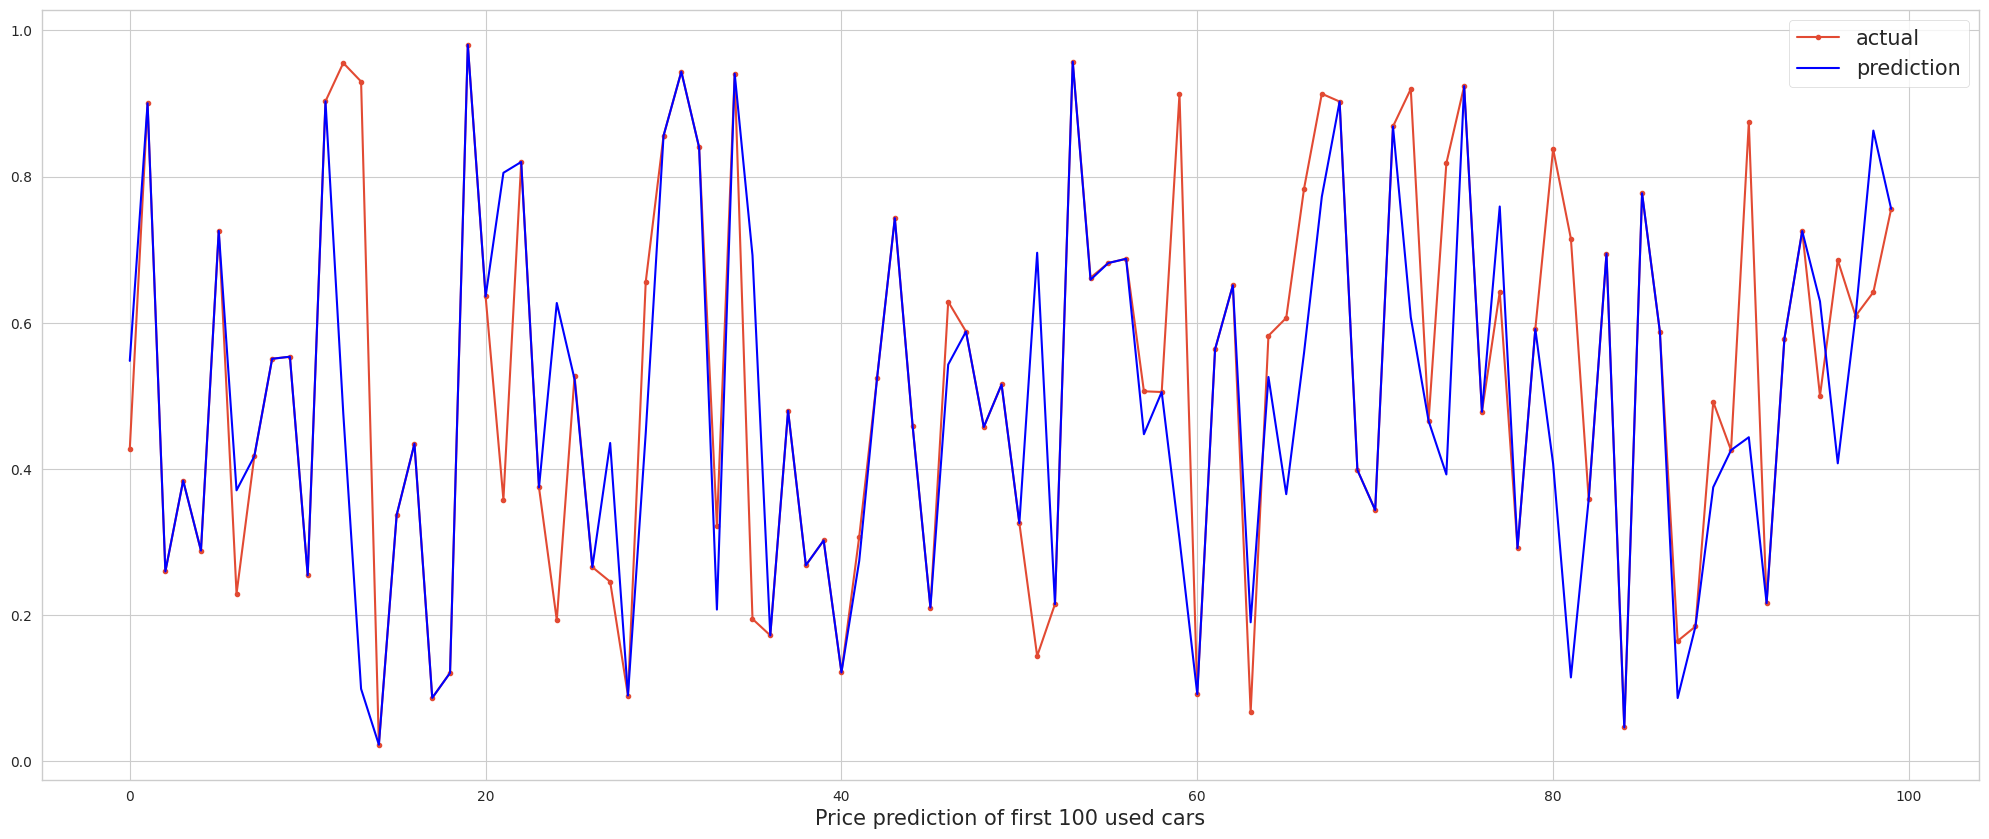

In [64]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))

# Ensure same length for both arrays
min_length = min(len(y_actual), len(y_predicted))

Graph_prediction(min_length, y_actual[:min_length], y_predicted[:min_length])


In [67]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


\

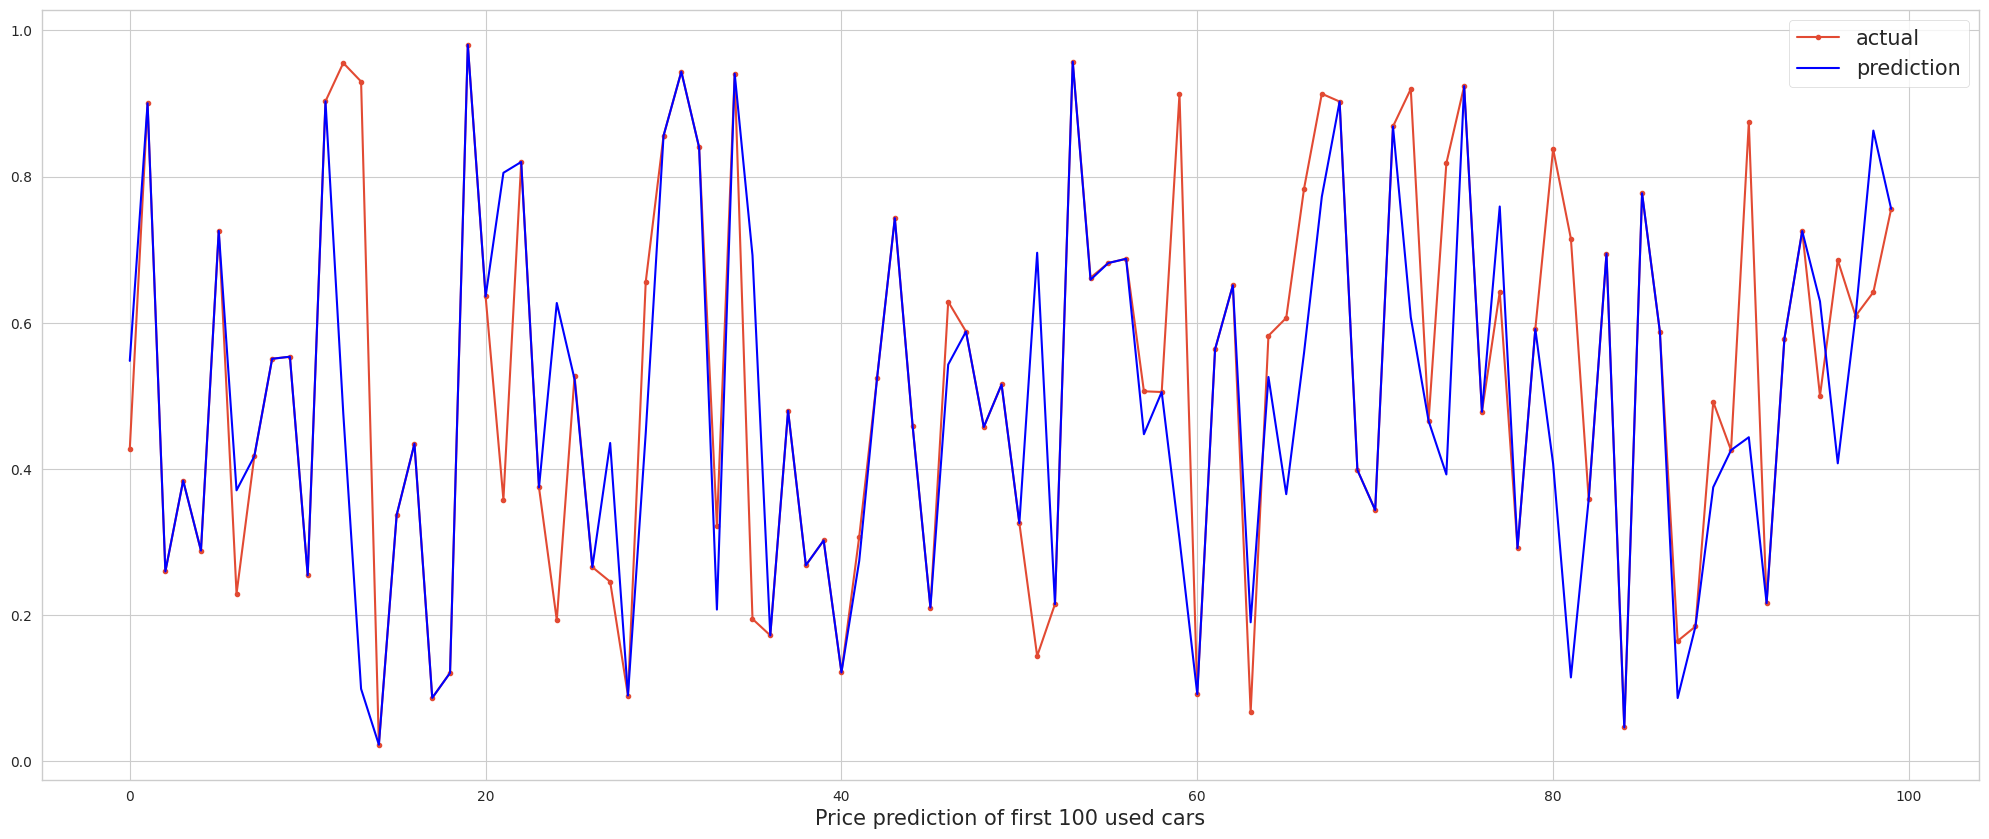

In [68]:
# Ensure same length for both arrays
min_length = min(len(y_actual), len(y_predicted), 150)

Graph_prediction(min_length, y_actual[:min_length], y_predicted[:min_length])


In [69]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,0.547877,0.427763,1.201137e-01,2.807950e+01
1,0.900276,0.900276,1.527100e-08,1.696258e-06
2,0.259849,0.259849,1.682073e-08,6.473280e-06
3,0.384056,0.384056,1.330366e-08,3.463994e-06
4,0.288397,0.288397,2.816910e-09,9.767472e-07
5,0.725760,0.725760,3.485868e-09,4.803059e-07
6,0.370793,0.229466,1.413269e-01,6.158944e+01
7,0.417491,0.417491,7.561592e-09,1.811200e-06
8,0.550747,0.550747,1.091144e-08,1.981205e-06
9,0.553558,0.553558,1.141905e-08,2.062846e-06


In [70]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

# Use the same features for training and testing
X = df_train[feature1]
y = df_train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
model.fit(X_train, y_train)

X0 = df_test[feature1]  # Ensure the same feature preprocessing
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id': df_test.index, 'Price': y_predicted})
submission.head(10)


,Car_id,Price
0,0,1.152070
1,1,1.128293
2,2,2.834978
3,3,1.466120
4,4,1.555349
5,5,2.440976
6,6,3.125546
7,7,0.988246
8,8,1.239647
9,9,2.387190


In [71]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission.csv
